In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.preprocessing import process_video, resize
from src.distance_measures import analyse_video
from src.gaussian_noise import generate_noise
from src.visualizer import visualize
plt.rcParams['image.cmap'] = 'gray'

In [8]:
L=100
size=400

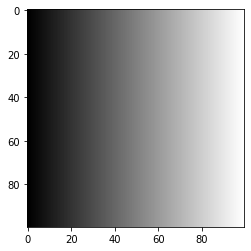

In [15]:
from skimage import io, morphology, filters
from skimage.color import rgb2gray, rgba2rgb
from skimage.morphology import label
from skimage.segmentation import clear_border
import numpy as np
import cv2
import matplotlib.pyplot as plt


def biasField(I,mask):
    (rows,cols) = I.shape
    r, c = np.meshgrid(list(range(rows)), list(range(cols)))
    rMsk = r[mask].flatten()
    cMsk = c[mask].flatten()
    VanderMondeMsk = np.array([rMsk*0+1, rMsk, cMsk, rMsk**2, rMsk*cMsk, cMsk**2]).T
    ValsMsk = I[mask].flatten()
    coeff, residuals, rank, singularValues = np.linalg.lstsq(VanderMondeMsk, ValsMsk, rcond=-1)
    VanderMonde = np.array([r*0+1, r, c, r**2, r*c, c**2]).T
    J = np.dot(VanderMonde, coeff) # @ operator is a python 3.5 feature!
    J = J.reshape((rows,cols)).T
    return(J)

arr = np.zeros((100, 100))
arr[:50, 10:20] = 0.1
arr[:50, 20:30] = 0.2
arr[:50, 30:40] = 0.3
arr[:50, 40:50] = 0.4
arr[:50, 50:60] = 0.5
arr[:50, 60:70] = 0.6
arr[:50, 70:80] = 0.7
arr[:50, 80:90] = 0.8
arr[:50, 90:100] = 0.9

mask=arr>0

y=biasField(arr,mask)
plt.imshow(y)

In [9]:
label_video = process_video('images/cheese_gel.avi', threshold=0.3, skip_size=239, size=1000)

In [10]:
labels = []
for i in range(12):
    labels.append(resize(label_video[1], size=size, corner=i*50))
labels = np.array(labels)

In [11]:
F_list, G_list = analyse_video(labels, L=L)

  0%|          | 0/12 [00:00<?, ?it/s]

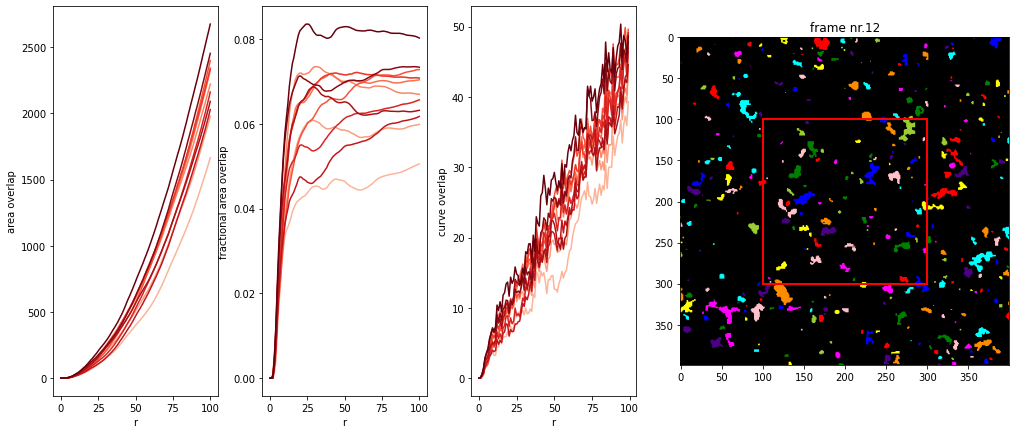

In [12]:
visualize(labels, F_list, G_list)